| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./1_Confusion_matrix.ipynb)| [⏩](./3_Decision_Tree.ipynb)|

# **2. K-Nearest Neighbors (K-NN)**

![K-Nearest Neighbors (K-NN)](../img/knn.webp "K-Nearest Neighbors (K-NN)")

El algoritmo K-Nearest Neighbors (K-NN) es un método de clasificación y regresión en machine learning. Es un algoritmo de aprendizaje supervisado que puede ser utilizado para predecir la etiqueta de una instancia basándose en las etiquetas de sus vecinos más cercanos en el espacio de características. Aquí hay una explicación detallada del algoritmo:

**Terminología del K-NN:**

1. **Instancia:** Un objeto o punto de datos que se va a clasificar o predecir.

2. **Espacio de Características:** Un espacio n-dimensional donde cada dimensión representa una característica de la instancia.

3. **Vecinos más cercanos:** Instancias en el conjunto de datos que tienen las características más similares a la instancia que se está evaluando.

4. **K:** El número de vecinos más cercanos que se deben tener en cuenta al realizar una predicción.

**Funcionamiento del K-NN:**

1. **Distancia:** Se mide la distancia entre la instancia a clasificar y todas las demás instancias en el conjunto de datos. La métrica de distancia comúnmente utilizada es la distancia euclidiana.

    $\text{Distancia Euclidiana} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

2. **Vecinos más cercanos:** Se seleccionan los K vecinos más cercanos a la instancia basándose en la distancia calculada.

3. **Clasificación o Predicción:** En el caso de clasificación, se asigna a la instancia la etiqueta que es más frecuente entre sus K vecinos más cercanos. En el caso de regresión, se toma la media de los valores de las etiquetas de los K vecinos.

**Ejemplo con gráficos en Python:**

Vamos a utilizar la biblioteca scikit-learn para implementar el K-NN en un conjunto de datos de ejemplo. En este caso, usaremos un conjunto de datos sintético de dos clases para facilitar la visualización.

Precisión del modelo: 1.00


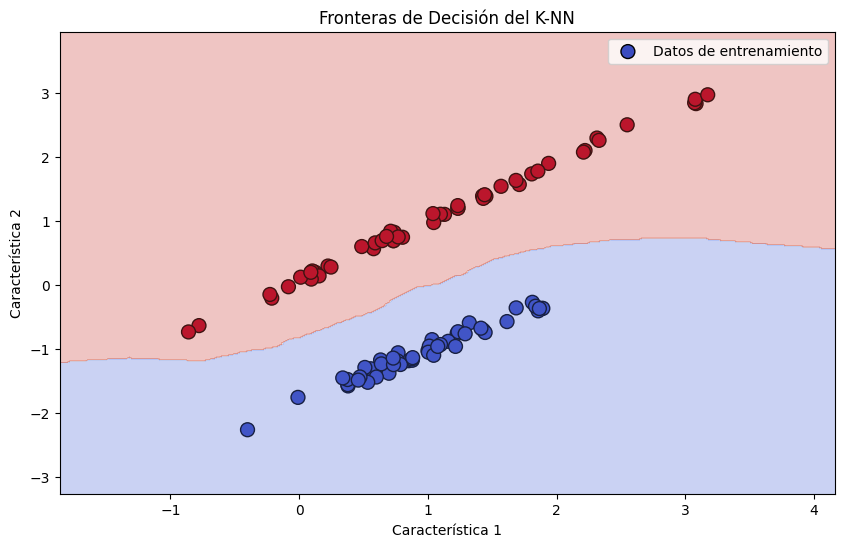

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el clasificador K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Visualizar el conjunto de datos y las fronteras de decisión del K-NN
plt.figure(figsize=(10, 6))

# Scatter plot para el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de entrenamiento')

# Fronteras de decisión
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

plt.title('Fronteras de Decisión del K-NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

En este ejemplo, se crea un conjunto de datos sintético con dos características y dos clases. El K-NN se entrena en el conjunto de datos y se visualizan las fronteras de decisión en un gráfico de dispersión junto con los datos de entrenamiento. La precisión del modelo se imprime al final. Puedes ajustar el valor de `n_neighbors` para cambiar la cantidad de vecinos considerados en la predicción.

### **Ejemplos**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Crear un DataFrame sintético
data = {'Feature1': np.random.randn(100), 'Feature2': np.random.randn(100), 'Label': np.random.choice([0, 1], size=100)}
df = pd.DataFrame(data)
df

,Feature1,Feature2,Label
0,0.968764,-0.918617,0
1,-0.576218,-0.129209,0
2,1.973100,0.232206,0
3,-2.314983,-1.094592,1
4,2.002140,1.084031,1
...,...,...,...
95,0.570617,-0.806743,1
96,1.176177,2.154499,1
97,1.652445,-0.366553,0
98,0.283254,1.652077,1


In [7]:
# Dividir el DataFrame en características (X) y etiquetas (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

In [8]:
X

,Feature1,Feature2
0,0.968764,-0.918617
1,-0.576218,-0.129209
2,1.973100,0.232206
3,-2.314983,-1.094592
4,2.002140,1.084031
...,...,...
95,0.570617,-0.806743
96,1.176177,2.154499
97,1.652445,-0.366553
98,0.283254,1.652077


In [9]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    0
98    1
99    0
Name: Label, Length: 100, dtype: int64

Precisión del modelo: 0.45


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


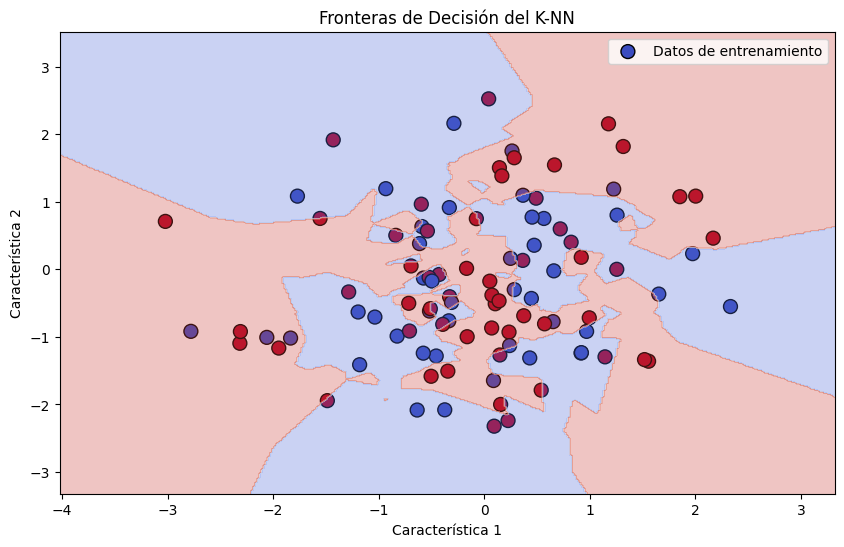

In [11]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asignar nombres a las características
X_train.columns = ['Feature1', 'Feature2']
X_test.columns = ['Feature1', 'Feature2']

# Crear y entrenar el clasificador K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Visualizar el conjunto de datos y las fronteras de decisión del K-NN
plt.figure(figsize=(10, 6))

# Scatter plot para el conjunto de datos
plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de entrenamiento')

# Fronteras de decisión
h = .02
x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)

plt.title('Fronteras de Decisión del K-NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

En el ejemplo que proporcioné, las variables tienen el siguiente significado:

- **Feature1 y Feature2:**

Estas son características o atributos del conjunto de datos. En este caso, son dos características sintéticas generadas aleatoriamente para propósitos de demostración. Pueden representar cualquier tipo de información que estés utilizando para hacer predicciones. Por ejemplo, si estás trabajando con datos de pacientes médicos, Feature1 y Feature2 podrían representar medidas biomédicas, y si estás trabajando con datos de clientes, podrían ser características relacionadas con el comportamiento del cliente.

- **Label:**

Esta es la variable objetivo o la etiqueta que estás tratando de predecir. En el ejemplo, es una variable binaria que puede tener valores 0 o 1. En problemas de clasificación, la variable objetivo suele ser la que estás tratando de clasificar. Por ejemplo, si estás construyendo un modelo para predecir si un correo electrónico es spam o no, la variable Label podría ser "Spam" (1) o "No Spam" (0).

En resumen, Feature1 y Feature2 son las características que el modelo utiliza para hacer predicciones, y Label es la variable que el modelo trata de predecir. Este es un ejemplo sintético para propósitos de demostración, y en problemas del mundo real, las características y las etiquetas estarían basadas en la naturaleza específica de tu conjunto de datos y del problema que estás abordando.

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./1_Confusion_matrix.ipynb)| [⏩](./3_Decision_Tree.ipynb)|